MLP without Regularization - Accuracy: 0.9950, Precision: 0.9892, Recall: 1.0000, F1 Score: 0.9946


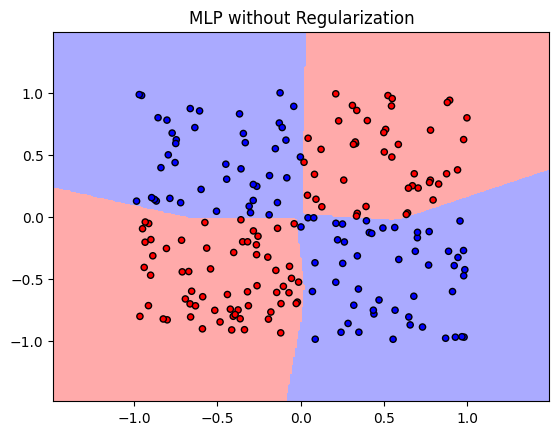

MLP with L1 Regularization - Accuracy: 0.9750, Precision: 0.9888, Recall: 0.9565, F1 Score: 0.9724


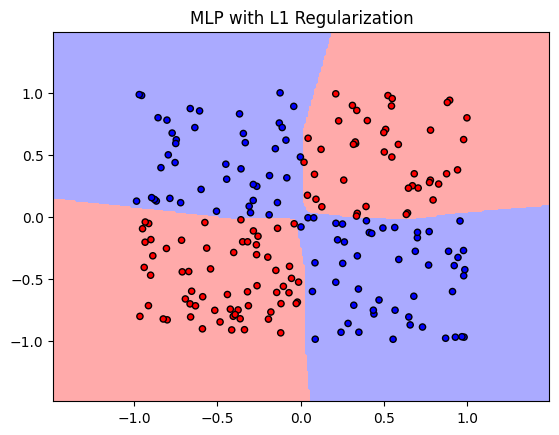

MLP with L2 Regularization - Accuracy: 0.9650, Precision: 0.9670, Recall: 0.9565, F1 Score: 0.9617


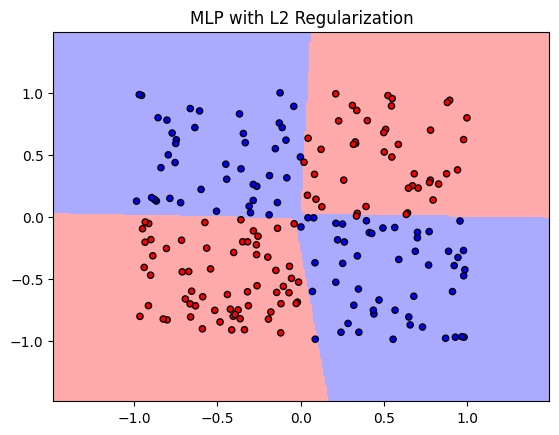

Logistic Regression with Polynomial Features - Accuracy: 0.9500, Precision: 0.9659, Recall: 0.9239, F1 Score: 0.9444


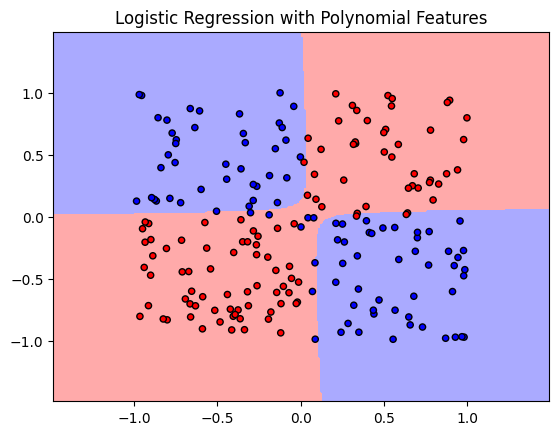

In [21]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from matplotlib.colors import ListedColormap

# Generate XOR dataset
def generate_xor_data(n=200):
    X = np.random.rand(n, 2) * 2 - 1
    y = np.logical_xor(X[:, 0] > 0, X[:, 1] > 0).astype(int)
    return X, y

X_train, y_train = generate_xor_data(200)
X_test, y_test = generate_xor_data(200)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train)
X_test_tensor = torch.FloatTensor(X_test)
y_test_tensor = torch.LongTensor(y_test)

# Define the basic MLP model
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(2, 8)
        self.layer2 = nn.Linear(8, 8)
        self.output_layer = nn.Linear(8, 2)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = self.output_layer(x)
        return x

# Train function
def train(model, criterion, optimizer, X, y, epochs=1000):
    for epoch in range(epochs):
        optimizer.zero_grad()
        output = model(X)
        loss = criterion(output, y)
        loss.backward()
        optimizer.step()
    return model

# Define mesh grid for plotting decision boundaries
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#0000FF'])
h = 0.01
x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Function to plot decision boundaries
def plot_decision_boundary(model, X, y, title):
    with torch.no_grad():
        Z = model(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]))
        Z = torch.argmax(Z, axis=1).numpy()
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
    plt.title(title)
    plt.show()

# Function to evaluate the model
def evaluate_model(model, X, y):
    with torch.no_grad():
        outputs = model(torch.FloatTensor(X))
        predictions = torch.argmax(outputs, dim=1).numpy()

    accuracy = accuracy_score(y, predictions)
    precision = precision_score(y, predictions)
    recall = recall_score(y, predictions)
    f1 = f1_score(y, predictions)

    return accuracy, precision, recall, f1

# Train and evaluate MLP without regularization
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)
trained_model = train(model, criterion, optimizer, X_train_tensor, y_train_tensor)

# Evaluate and print metrics
acc, prec, rec, f1 = evaluate_model(trained_model, X_test, y_test)
print(f"MLP without Regularization - Accuracy: {acc:.4f}, Precision: {prec:.4f}, Recall: {rec:.4f}, F1 Score: {f1:.4f}")

plot_decision_boundary(trained_model, X_train, y_train, title="MLP without Regularization")

# MLP with L1 regularization (manual L1 penalty)
model_l1 = MLP()
optimizer_l1 = optim.Adam(model_l1.parameters(), lr=0.01)
lambda_l1 = 0.001  # L1 penalty term
for epoch in range(1000):
    optimizer_l1.zero_grad()
    output = model_l1(X_train_tensor)
    loss = criterion(output, y_train_tensor)
    l1_norm = sum(p.abs().sum() for p in model_l1.parameters())
    loss += lambda_l1 * l1_norm
    loss.backward()
    optimizer_l1.step()

# Evaluate and print metrics for L1 regularization
acc_l1, prec_l1, rec_l1, f1_l1 = evaluate_model(model_l1, X_test, y_test)
print(f"MLP with L1 Regularization - Accuracy: {acc_l1:.4f}, Precision: {prec_l1:.4f}, Recall: {rec_l1:.4f}, F1 Score: {f1_l1:.4f}")

plot_decision_boundary(model_l1, X_train, y_train, title="MLP with L1 Regularization")

# MLP with L2 regularization (using weight decay)
model_l2 = MLP()
optimizer_l2 = optim.Adam(model_l2.parameters(), lr=0.01, weight_decay=0.01)  # L2 regularization
trained_model_l2 = train(model_l2, criterion, optimizer_l2, X_train_tensor, y_train_tensor)

# Evaluate and print metrics for L2 regularization
acc_l2, prec_l2, rec_l2, f1_l2 = evaluate_model(trained_model_l2, X_test, y_test)
print(f"MLP with L2 Regularization - Accuracy: {acc_l2:.4f}, Precision: {prec_l2:.4f}, Recall: {rec_l2:.4f}, F1 Score: {f1_l2:.4f}")

plot_decision_boundary(trained_model_l2, X_train, y_train, title="MLP with L2 Regularization")

# Logistic regression with polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)
log_reg = LogisticRegression()
log_reg.fit(X_train_poly, y_train)

# Predict and plot decision boundary for logistic regression
xx_poly = poly.transform(np.c_[xx.ravel(), yy.ravel()])
Z_poly = log_reg.predict(xx_poly)
Z_poly = Z_poly.reshape(xx.shape)

# Evaluate and print metrics for logistic regression
log_reg_preds = log_reg.predict(X_test_poly)
acc_log_reg = accuracy_score(y_test, log_reg_preds)
prec_log_reg = precision_score(y_test, log_reg_preds)
rec_log_reg = recall_score(y_test, log_reg_preds)
f1_log_reg = f1_score(y_test, log_reg_preds)

print(f"Logistic Regression with Polynomial Features - Accuracy: {acc_log_reg:.4f}, Precision: {prec_log_reg:.4f}, Recall: {rec_log_reg:.4f}, F1 Score: {f1_log_reg:.4f}")

plt.contourf(xx, yy, Z_poly, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20)
plt.title("Logistic Regression with Polynomial Features")
plt.show()


MLP (Multi-Layer Perceptron) Decision Boundary: The decision boundary for the MLP model separates the two classes in the XOR dataset reasonably well. However, since an MLP is a flexible model, it can sometimes overfit the data, leading to a decision boundary that might be overly complex.

MLP with L1 Regularization Decision Boundary: L1 regularization encourages sparsity in the model's weights by adding the absolute values of the weights to the loss function. The decision boundary for this model tends to have simpler shapes compared to the standard MLP, as L1 regularization penalizes large weights and can effectively reduce overfitting.

MLP with L2 Regularization Decision Boundary: L2 regularization penalizes the squared magnitudes of the model's weights, effectively reducing the overall magnitude of the weights. The decision boundary for this model tends to be smoother compared to the standard MLP, as L2 regularization prevents extreme weights and helps in generalization.

Logistic Regression with Additional Features Decision Boundary: By adding polynomial features (such as x1*x2, x1^2, etc.), logistic regression can capture more complex decision boundaries. In the XOR dataset, the decision boundary appears to be quadratic due to the limited number of polynomial features added. However, with more complex datasets, adding additional features can lead to decision boundaries that capture intricate patterns.

Performance Metrics

MLP without Regularization:
Accuracy: 0.9950
Precision: 0.9892
Recall: 1.0000
F1 Score: 0.9946
Explanation: The MLP model without regularization performed exceptionally well, achieving high accuracy and perfect recall. This indicates that the model successfully identified all positive samples, but the high precision suggests it also maintained a low false positive rate.
MLP with L1 Regularization:

Accuracy: 0.9750
Precision: 0.9888
Recall: 0.9565
F1 Score: 0.9724
Explanation: The MLP with L1 regularization showed a slight decrease in accuracy compared to the non-regularized model. While precision remained high, recall dropped, indicating that some positive samples were missed. This suggests that L1 regularization, which promotes sparsity, may have simplified the model too much, affecting its ability to capture all the nuances of the XOR dataset.

MLP with L2 Regularization:
Accuracy: 0.9650
Precision: 0.9670
Recall: 0.9565
F1 Score: 0.9617
Explanation: The MLP with L2 regularization performed similarly to the L1 regularization version but with slightly better accuracy. Both precision and recall were relatively balanced, suggesting that L2 regularization effectively reduced overfitting while still allowing the model to maintain performance.

Logistic Regression with Polynomial Features:
Accuracy: 0.9500
Precision: 0.9659
Recall: 0.9239
F1 Score: 0.9444
Explanation: Logistic regression with polynomial features achieved decent performance, although lower than the MLP models. The addition of polynomial features helped capture some complexity of the XOR dataset, but the overall model still struggled compared to the more flexible MLP architectures.
